# Análise dos pacientes sem os exames

In [1]:
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

# Lendo Dados

In [2]:
e_exames = pd.read_csv('Einstein/einstein_small_dataset_exames.csv', sep='|', engine='python')
e_pacientes = pd.read_csv('Einstein/einstein_small_dataset_paciente1.csv', sep='|', engine='python')

In [3]:
f_exames = pd.read_csv('Fleury/Grupo_Fleury_Small_Dataset_Covid19_Resultados_Exames_1.csv', sep='|', encoding = "ISO-8859-1")
f_pacientes = pd.read_csv('Fleury/Grupo_Fleury_Small_Dataset_Covid19_Pacientes.csv', sep='|', encoding = "ISO-8859-1")

In [4]:
s_exames = pd.read_csv('SirioLibanes/small/COVID_LAB_RESULT.csv', sep='|')
s_pacientes = pd.read_csv('SirioLibanes/small/COVID_PATIENT.csv', sep='|')

# Merging pacientes

In [5]:
s_pacientes.columns = map(str.lower, s_pacientes.columns)
e_pacientes.columns = map(str.lower, e_pacientes.columns)
f_pacientes.columns = map(str.lower, f_pacientes.columns)

pacientes = pd.concat([s_pacientes, e_pacientes, f_pacientes])

In [6]:
pacientes.head()

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_distrito
0,7D45FE3D655E66784DD28970EF49ADCA,F,1984,Brasil,SP,São Paulo,NaN
1,E33BF02768C6B38404CB6533703D0D2B,M,1984,Brasil,SP,São Paulo,NaN
2,0BA8C352CCBDC9BEC24A30D5938E49B2,M,1987,Brasil,SP,Sao Paulo,NaN
3,C7A2FFAF332245084105ABBC61C744E9,M,1980,Brasil,SP,Guarulhos,NaN
4,3ECDE1017B0467B9D6C133C9770D99EA,F,1982,Brasil,SP,São Paulo,NaN


# Valores Faltantes

- Apenas dados de localização estão faltando. Os dados sobre Distrito só estão preenchidos na tabela do Fleury

In [7]:
pacientes.isna().sum()

id_paciente        0
ic_sexo            0
aa_nascimento      0
cd_pais            2
cd_uf              0
cd_municipio       0
cd_distrito      203
dtype: int64

- Substituindo país faltante por Brasil, pois as linhas que não tem esse valor tem São Paulo como cidade e SP como estado. Dados de distrito não são preenchidos.

In [8]:
pacientes['cd_pais'] = pacientes['cd_pais'].fillna('Brasil')

In [9]:
pacientes.isna().sum()

id_paciente        0
ic_sexo            0
aa_nascimento      0
cd_pais            0
cd_uf              0
cd_municipio       0
cd_distrito      203
dtype: int64

# Normalizando valores de bases distintas

## Renomeando Cidades

- Valores passam a não ter acentos e ter tipo Título

In [10]:
pacientes['cd_municipio'].unique()

array(['São Paulo', 'Sao Paulo', 'Guarulhos', 'Campos do Jordão',
       'SAO PAULO', 'SANTANA DE PARNAIBA', 'JUNDIAI', 'GUARULHOS', 'MAUA',
       'SAO BERNARDO DO CAMPO', 'ATIBAIA', 'SANTO ANDRE',
       'SAO CAETANO DO SUL', 'COTIA', 'BRAGANCA PAULISTA'], dtype=object)

In [11]:
pacientes['cd_municipio'] = pacientes['cd_municipio'].str.replace('ã', 'a')
pacientes['cd_municipio'] = pacientes['cd_municipio'].str.title()

In [12]:
pacientes['cd_municipio'].unique()

array(['Sao Paulo', 'Guarulhos', 'Campos Do Jordao',
       'Santana De Parnaiba', 'Jundiai', 'Maua', 'Sao Bernardo Do Campo',
       'Atibaia', 'Santo Andre', 'Sao Caetano Do Sul', 'Cotia',
       'Braganca Paulista'], dtype=object)

## Renomeando País

In [13]:
pacientes['cd_pais'].unique()

array(['Brasil', 'BR'], dtype=object)

In [14]:
pacientes['cd_pais'] = 'BR'

# Analisando Gênero 

## Sem cidade

In [15]:
pacientes.groupby('ic_sexo', as_index=False)['id_paciente'].count()

,ic_sexo,id_paciente
0,F,157
1,I,1
2,M,145


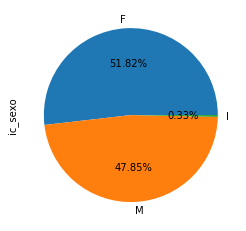

In [16]:
pacientes['ic_sexo'].value_counts().plot(kind='pie', autopct='%.2f%%')

## Com cidade

In [17]:
pacientes.groupby(['cd_municipio', 'ic_sexo'], as_index=False)['id_paciente'].count()

,cd_municipio,ic_sexo,id_paciente
0,Atibaia,F,1
1,Braganca Paulista,F,1
2,Campos Do Jordao,F,1
3,Campos Do Jordao,M,1
4,Cotia,F,1
5,Cotia,M,1
6,Guarulhos,F,7
7,Guarulhos,M,7
8,Jundiai,F,2
9,Jundiai,I,1


In [18]:
pd.crosstab(pacientes['ic_sexo'], pacientes['cd_municipio'])

cd_municipio,Atibaia,Braganca Paulista,Campos Do Jordao,Cotia,Guarulhos,Jundiai,Maua,Santana De Parnaiba,Santo Andre,Sao Bernardo Do Campo,Sao Caetano Do Sul,Sao Paulo
ic_sexo,,,,,,,,,,,,
F,1,1,1,1,7,2,3,3,2,2,1,133
I,0,0,0,0,0,1,0,0,0,0,0,0
M,0,0,1,1,7,4,0,5,1,0,0,126


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fc2c52d0>,
      dtype=object)

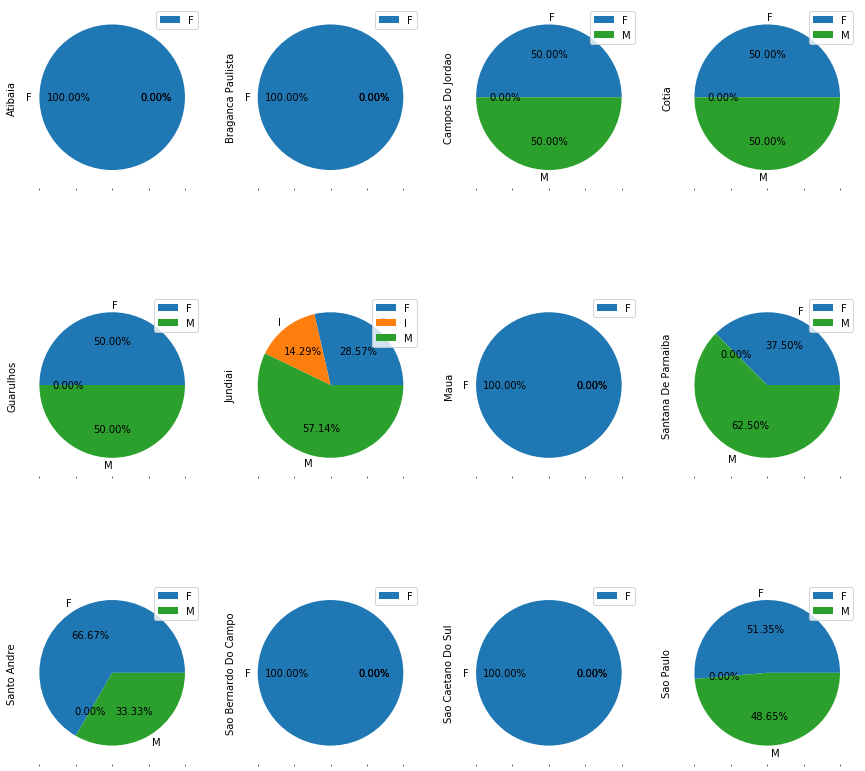

In [19]:
pd.crosstab(pacientes['ic_sexo'], pacientes['cd_municipio']).plot(kind='pie', autopct='%.2f%%', subplots=True, figsize=(15,15), layout=(3,4))

# Analisando Ano de Nascimento / Idade

In [20]:
pacientes['idade'] = 2020 - pacientes['aa_nascimento']

## Máximo e Mínimo

In [21]:
pacientes['idade'].max()

66

In [22]:
pacientes['idade'].min()

2

## Quantidade

In [23]:
pacientes.groupby('idade', as_index=False)['id_paciente'].count()

,idade,id_paciente
0,2,2
1,3,1
2,11,1
3,19,1
4,20,3
5,30,25
6,33,13
7,34,13
8,35,12
9,36,14


## Histograma

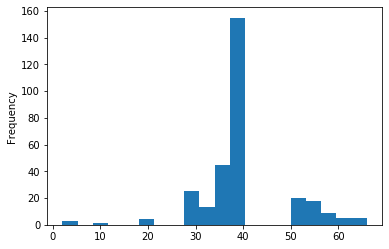

In [24]:
pacientes['idade'].plot(kind='hist', bins=20)

## Distribuição das idades por cidade

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fc2c4f10>,
      dtype=object)

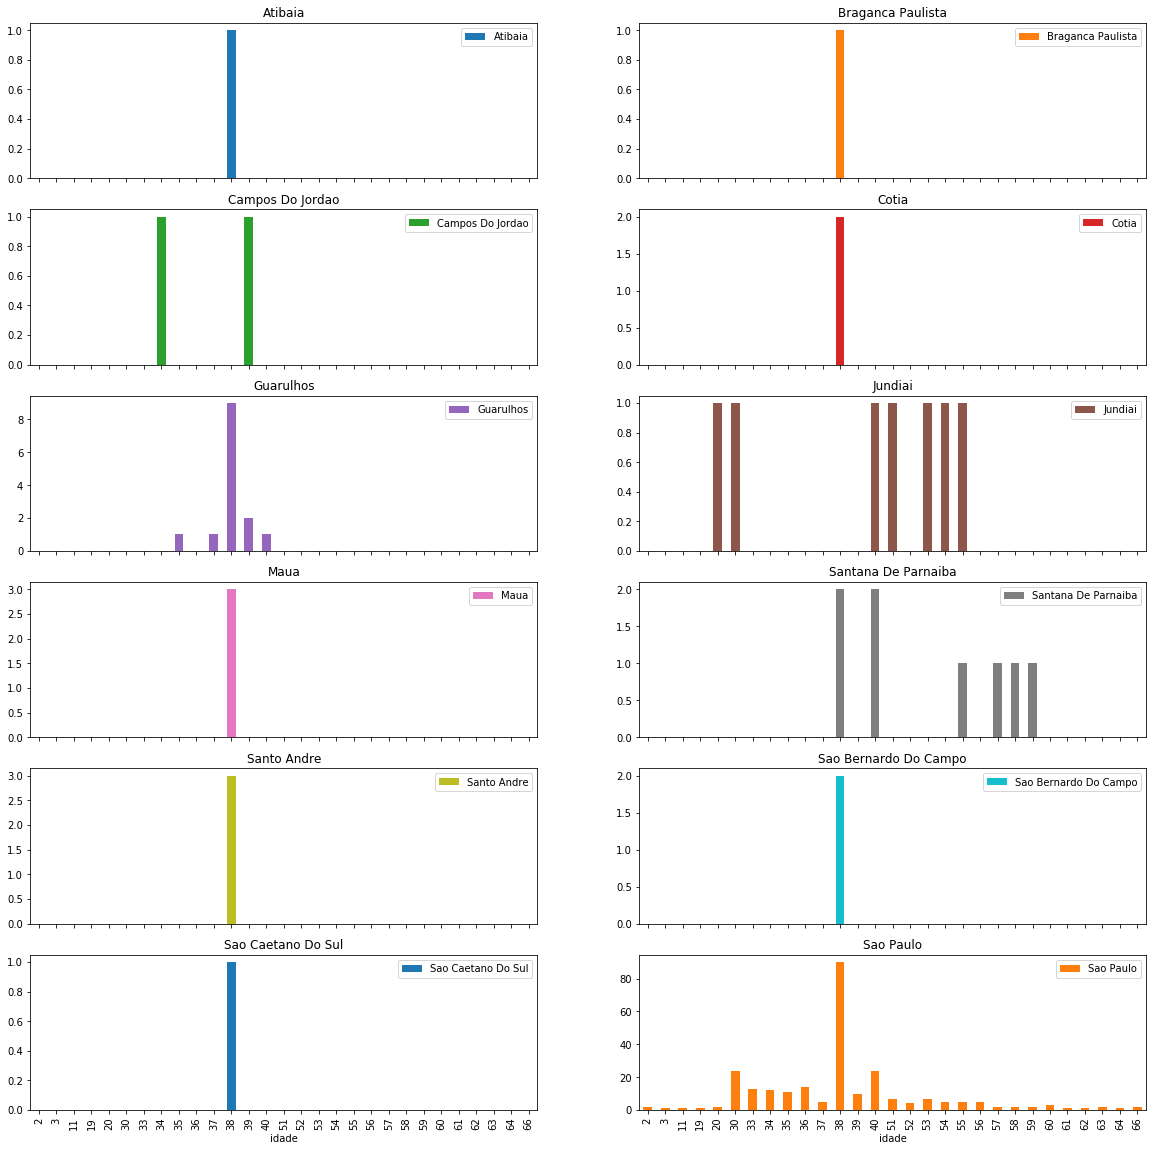

In [25]:
pd.crosstab(pacientes['idade'], pacientes['cd_municipio']).plot(kind='bar', subplots=True, figsize=(20,20), layout=(6,2))

# Analisando Cidades

In [26]:
detalhes = pd.read_csv('BRAZIL_CITIES.csv', usecols=['CITY', 'STATE', 'LONG', 'LAT'], sep=';')
detalhes = detalhes[detalhes['STATE'] == 'SP']
detalhes = detalhes.drop('STATE', axis=1)
detalhes['CITY'] = detalhes['CITY'].str.replace('ã', 'a')
detalhes['CITY'] = detalhes['CITY'].str.replace('á', 'a')
detalhes['CITY'] = detalhes['CITY'].str.replace('í', 'i')
detalhes['CITY'] = detalhes['CITY'].str.replace('ç', 'c')
detalhes['CITY'] = detalhes['CITY'].str.replace('é', 'e')
pacientes_cidades = pacientes.merge(detalhes, left_on='cd_municipio', right_on='CITY')

In [27]:
mapa = folium.Map(location=[-23.2, -46.3], zoom_start=9)
cidades = list(pacientes_cidades['CITY'])
latitudes = list(pacientes_cidades['LAT'])
longitudes = list(pacientes_cidades['LONG'])

for cid, lat, lng in zip(cidades, latitudes, longitudes):
    folium.Marker(location=[lat, lng], tooltip=[cid, lat, lng]).add_to(mapa)

mapa

In [28]:
heat_map = folium.Map(location=[-23.2, -46.3], zoom_start=9)
HeatMap(data=pacientes_cidades[['LAT', 'LONG']], radius=15, max_zoom=13).add_to(heat_map)
heat_map

# Analisando Estados

- Só tem SP

In [29]:
pacientes['cd_uf'].unique()

array(['SP'], dtype=object)

# Analisando País

- Só tem BR

In [30]:
pacientes['cd_pais'].unique()

array(['BR'], dtype=object)